Import Packages from MySQL

In [208]:
#%pip install pyodc
#%pip install mysql-connector-python
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import datetime
import time
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#%matplotlib notebook
#%matplotlib qt
#%matplotlib tk
#%matplotlib wx
os.environ['MYSQL_PASSWORD'] = open('/Users/cole/OneDrive/Important Keys/SQL_Password.txt').read()
password = os.environ.get('MYSQL_PASSWORD')
#print(password)

In [209]:
cnx = mysql.connector.connect(user='root', password=password,
database='myschema')
cursor = cnx.cursor()
query = ("SELECT * FROM myschema.uwh")
df = pd.read_sql(query, cnx)

In [210]:
df.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"Dec. 24, 2022","Dec. 24, 2022",Run,411,3.10000,1763,9.47849,0,6.33012,0,,4692,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7017168757
1,"Dec. 24, 2022","Dec. 23, 2022",Run,410,3.09999,1750,9.40860,0,6.37714,0,,4661,b'',Map My Fitness MapMyFitness Web,http://www.mapmyfitness.com/workout/7016549059
2,"Dec. 20, 2022","Dec. 20, 2022",Run,420,3.10000,1870,10.05380,0,5.96791,0,,4948,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7012591120
3,"Dec. 20, 2022","Dec. 20, 2022",Run,411,3.10000,1760,9.46237,0,6.34091,0,,4685,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7011832183
4,"Dec. 19, 2022","Dec. 18, 2022",Run,410,3.10000,1754,9.43011,0,6.36260,0,,4671,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/7011193363


In [211]:
query = ("SHOW TABLES")

In [212]:
pd.read_sql(query, cnx)

,Tables_in_myschema
0,halo
1,mmr
2,mmr_clean
3,uwh


In [213]:
query = ("SELECT * FROM myschema.uwh")
df = pd.read_sql(query, cnx)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          744 non-null    object 
 1   Workout Date            744 non-null    object 
 2   Activity Type           744 non-null    object 
 3   Calories Burned (kCal)  744 non-null    int64  
 4   Distance (mi)           744 non-null    float64
 5   Workout Time (seconds)  744 non-null    int64  
 6   Avg Pace (min/mi)       744 non-null    float64
 7   Max Pace                744 non-null    int64  
 8   Avg Speed (mi/h)        744 non-null    float64
 9   Max Speed               744 non-null    int64  
 10  Avg Heart Rate          744 non-null    object 
 11  Steps                   744 non-null    int64  
 12  Notes                   744 non-null    object 
 13  Source                  744 non-null    object 
 14  Link                    744 non-null    ob

In [214]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Date Submitted
False    744
Name: Date Submitted, dtype: int64

Workout Date
False    744
Name: Workout Date, dtype: int64

Activity Type
False    744
Name: Activity Type, dtype: int64

Calories Burned (kCal)
False    744
Name: Calories Burned (kCal), dtype: int64

Distance (mi)
False    744
Name: Distance (mi), dtype: int64

Workout Time (seconds)
False    744
Name: Workout Time (seconds), dtype: int64

Avg Pace (min/mi)
False    744
Name: Avg Pace (min/mi), dtype: int64

Max Pace
False    744
Name: Max Pace, dtype: int64

Avg Speed (mi/h)
False    744
Name: Avg Speed (mi/h), dtype: int64

Max Speed
False    744
Name: Max Speed, dtype: int64

Avg Heart Rate
False    744
Name: Avg Heart Rate, dtype: int64

Steps
False    744
Name: Steps, dtype: int64

Notes
False    744
Name: Notes, dtype: int64

Source
False    744
Name: Source, dtype: int64

Link
False    744
Name: Link, dtype: int64



In [215]:
df.isnull().sum()

Date Submitted            0
Workout Date              0
Activity Type             0
Calories Burned (kCal)    0
Distance (mi)             0
Workout Time (seconds)    0
Avg Pace (min/mi)         0
Max Pace                  0
Avg Speed (mi/h)          0
Max Speed                 0
Avg Heart Rate            0
Steps                     0
Notes                     0
Source                    0
Link                      0
dtype: int64

In [216]:
df.shape

(744, 15)

In [217]:
#%pip install sklearn
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
labels = label_encode.fit_transform(df['Distance (mi)'])
df['target'] = labels
df.drop(columns=['Link', 'Source', 'Notes'], axis=1, inplace=True)

In [218]:
df.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,target
0,"Dec. 24, 2022","Dec. 24, 2022",Run,411,3.10000,1763,9.47849,0,6.33012,0,,4692,276
1,"Dec. 24, 2022","Dec. 23, 2022",Run,410,3.09999,1750,9.40860,0,6.37714,0,,4661,275
2,"Dec. 20, 2022","Dec. 20, 2022",Run,420,3.10000,1870,10.05380,0,5.96791,0,,4948,276
3,"Dec. 20, 2022","Dec. 20, 2022",Run,411,3.10000,1760,9.46237,0,6.34091,0,,4685,276
4,"Dec. 19, 2022","Dec. 18, 2022",Run,410,3.10000,1754,9.43011,0,6.36260,0,,4671,276


In [219]:
df['Date Submitted'] = pd.to_datetime(df['Date Submitted'])
df['Date Submitted'] = df['Date Submitted'].dt.strftime('%Y-%m-%d')
df['Workout Date'] = pd.to_datetime(df['Workout Date'])
df['Workout Date'] = df['Workout Date'].dt.strftime('%Y-%m-%d')

In [220]:
df.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,target
0,2022-12-24,2022-12-24,Run,411,3.10000,1763,9.47849,0,6.33012,0,,4692,276
1,2022-12-24,2022-12-23,Run,410,3.09999,1750,9.40860,0,6.37714,0,,4661,275
2,2022-12-20,2022-12-20,Run,420,3.10000,1870,10.05380,0,5.96791,0,,4948,276
3,2022-12-20,2022-12-20,Run,411,3.10000,1760,9.46237,0,6.34091,0,,4685,276
4,2022-12-19,2022-12-18,Run,410,3.10000,1754,9.43011,0,6.36260,0,,4671,276


<AxesSubplot:xlabel='Activity Type', ylabel='count'>

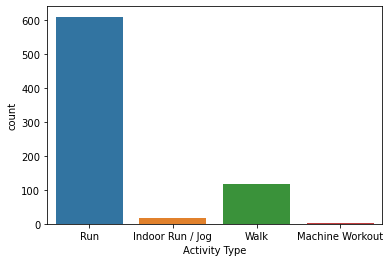

In [221]:
sns.countplot(x='Activity Type', data=df)

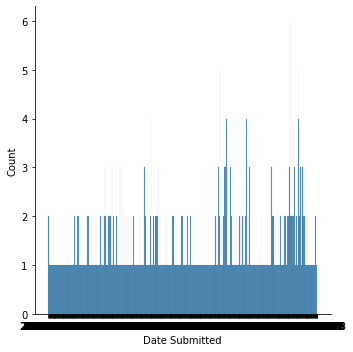

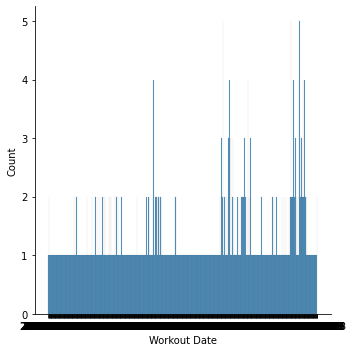

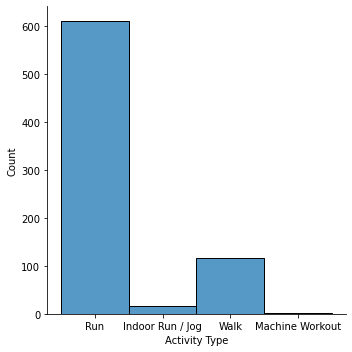

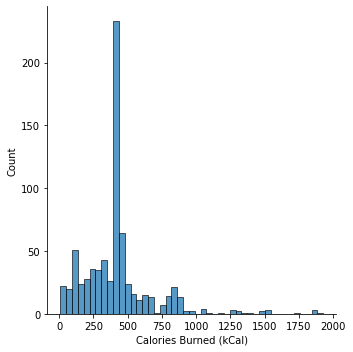

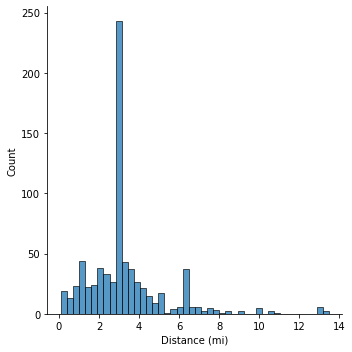

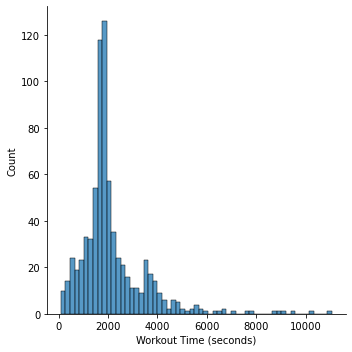

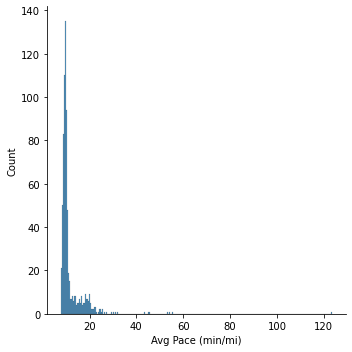

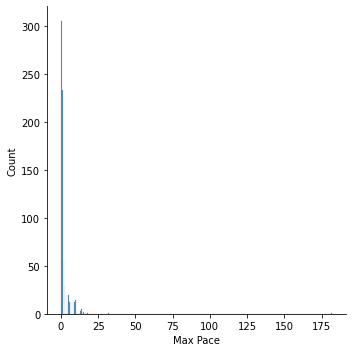

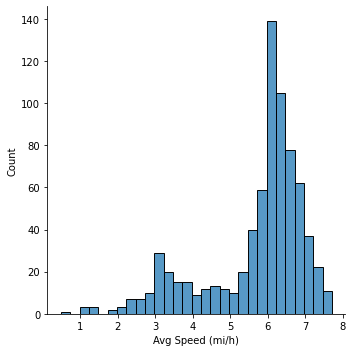

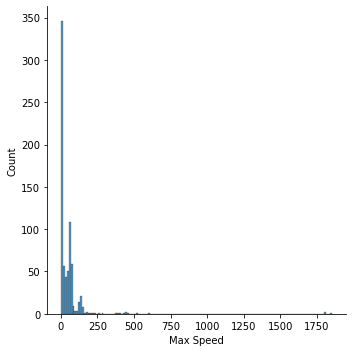

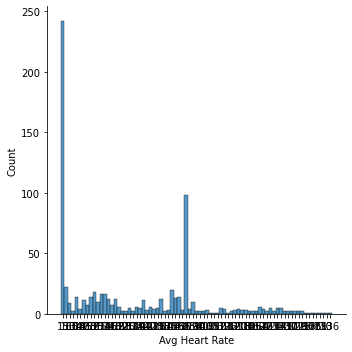

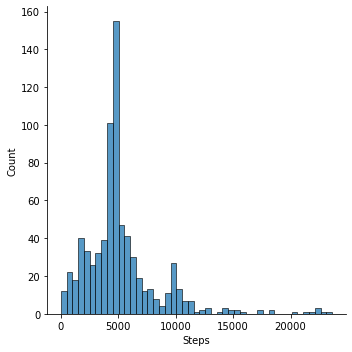

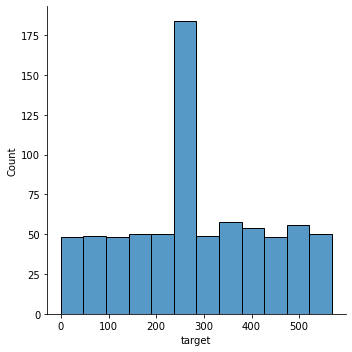

In [222]:
for i in df.columns:
    sns.displot(df[i])

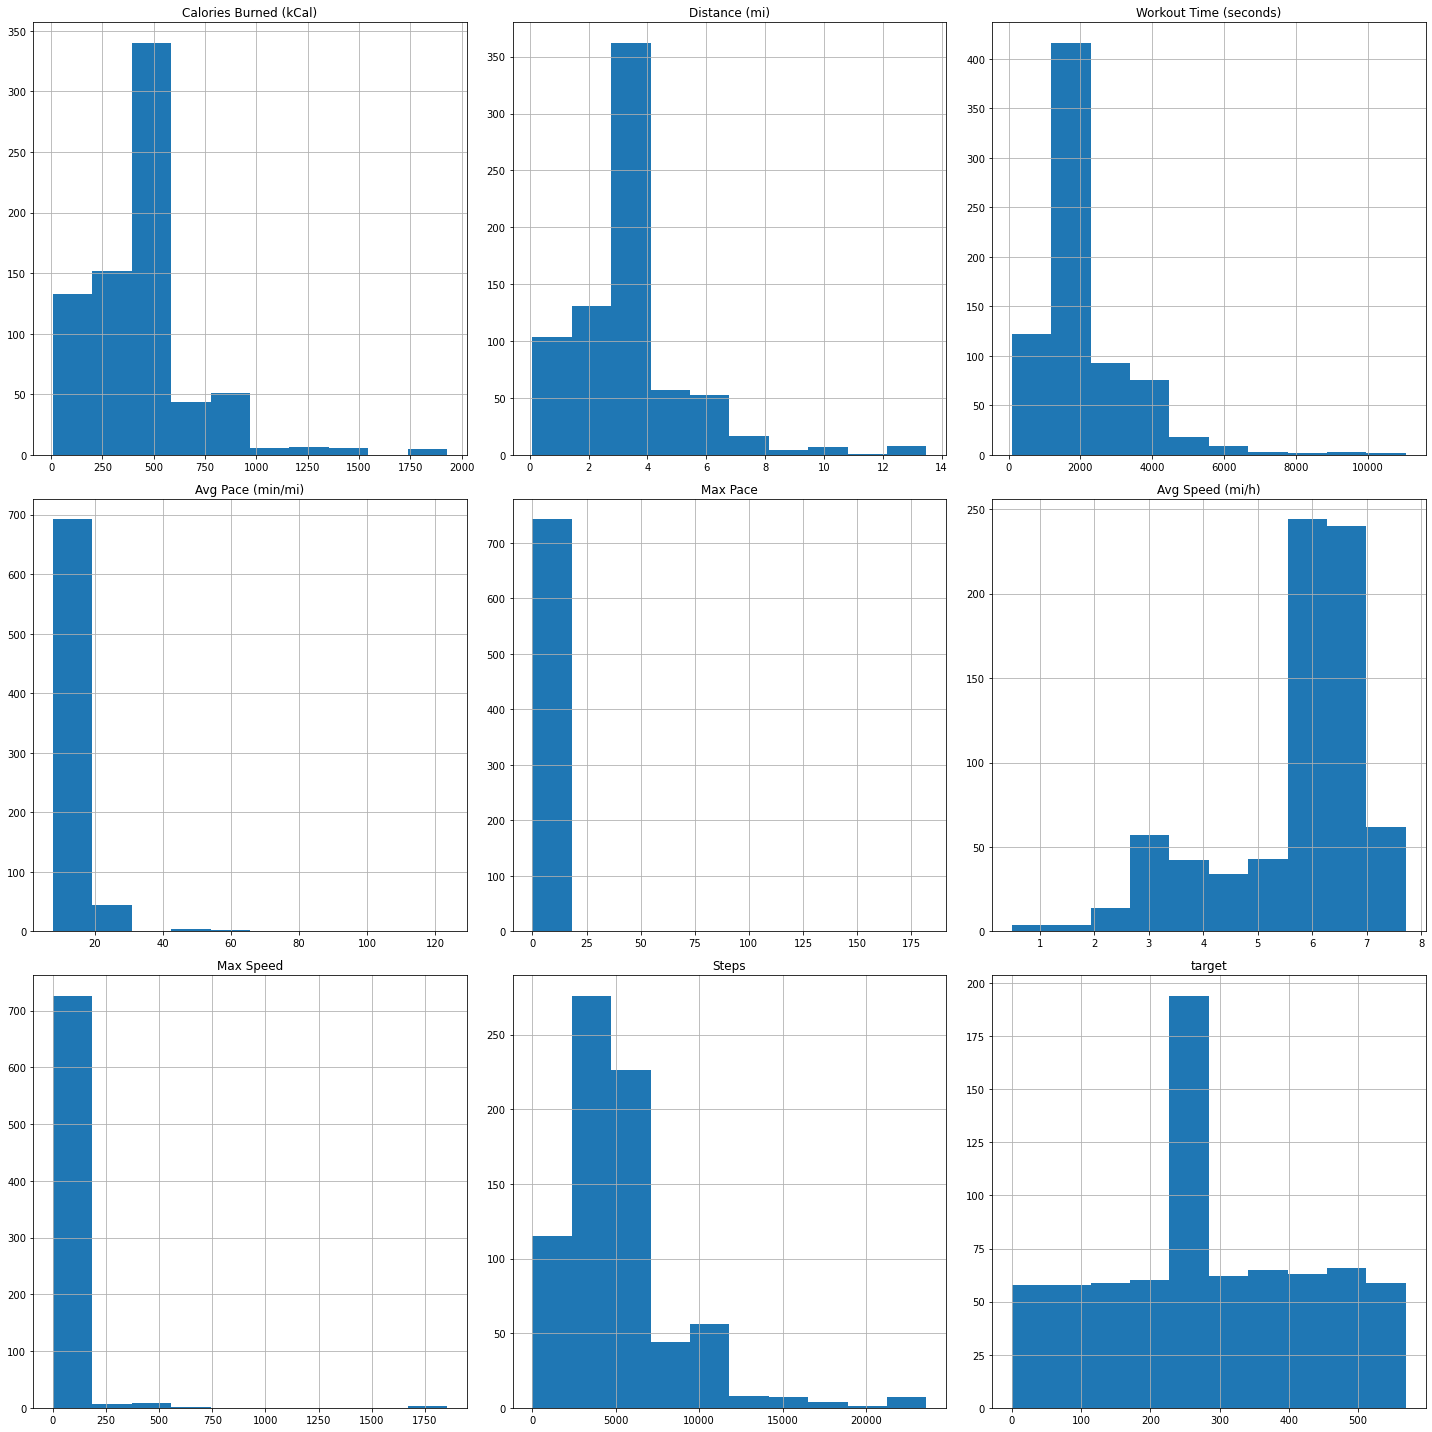

In [223]:
df.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

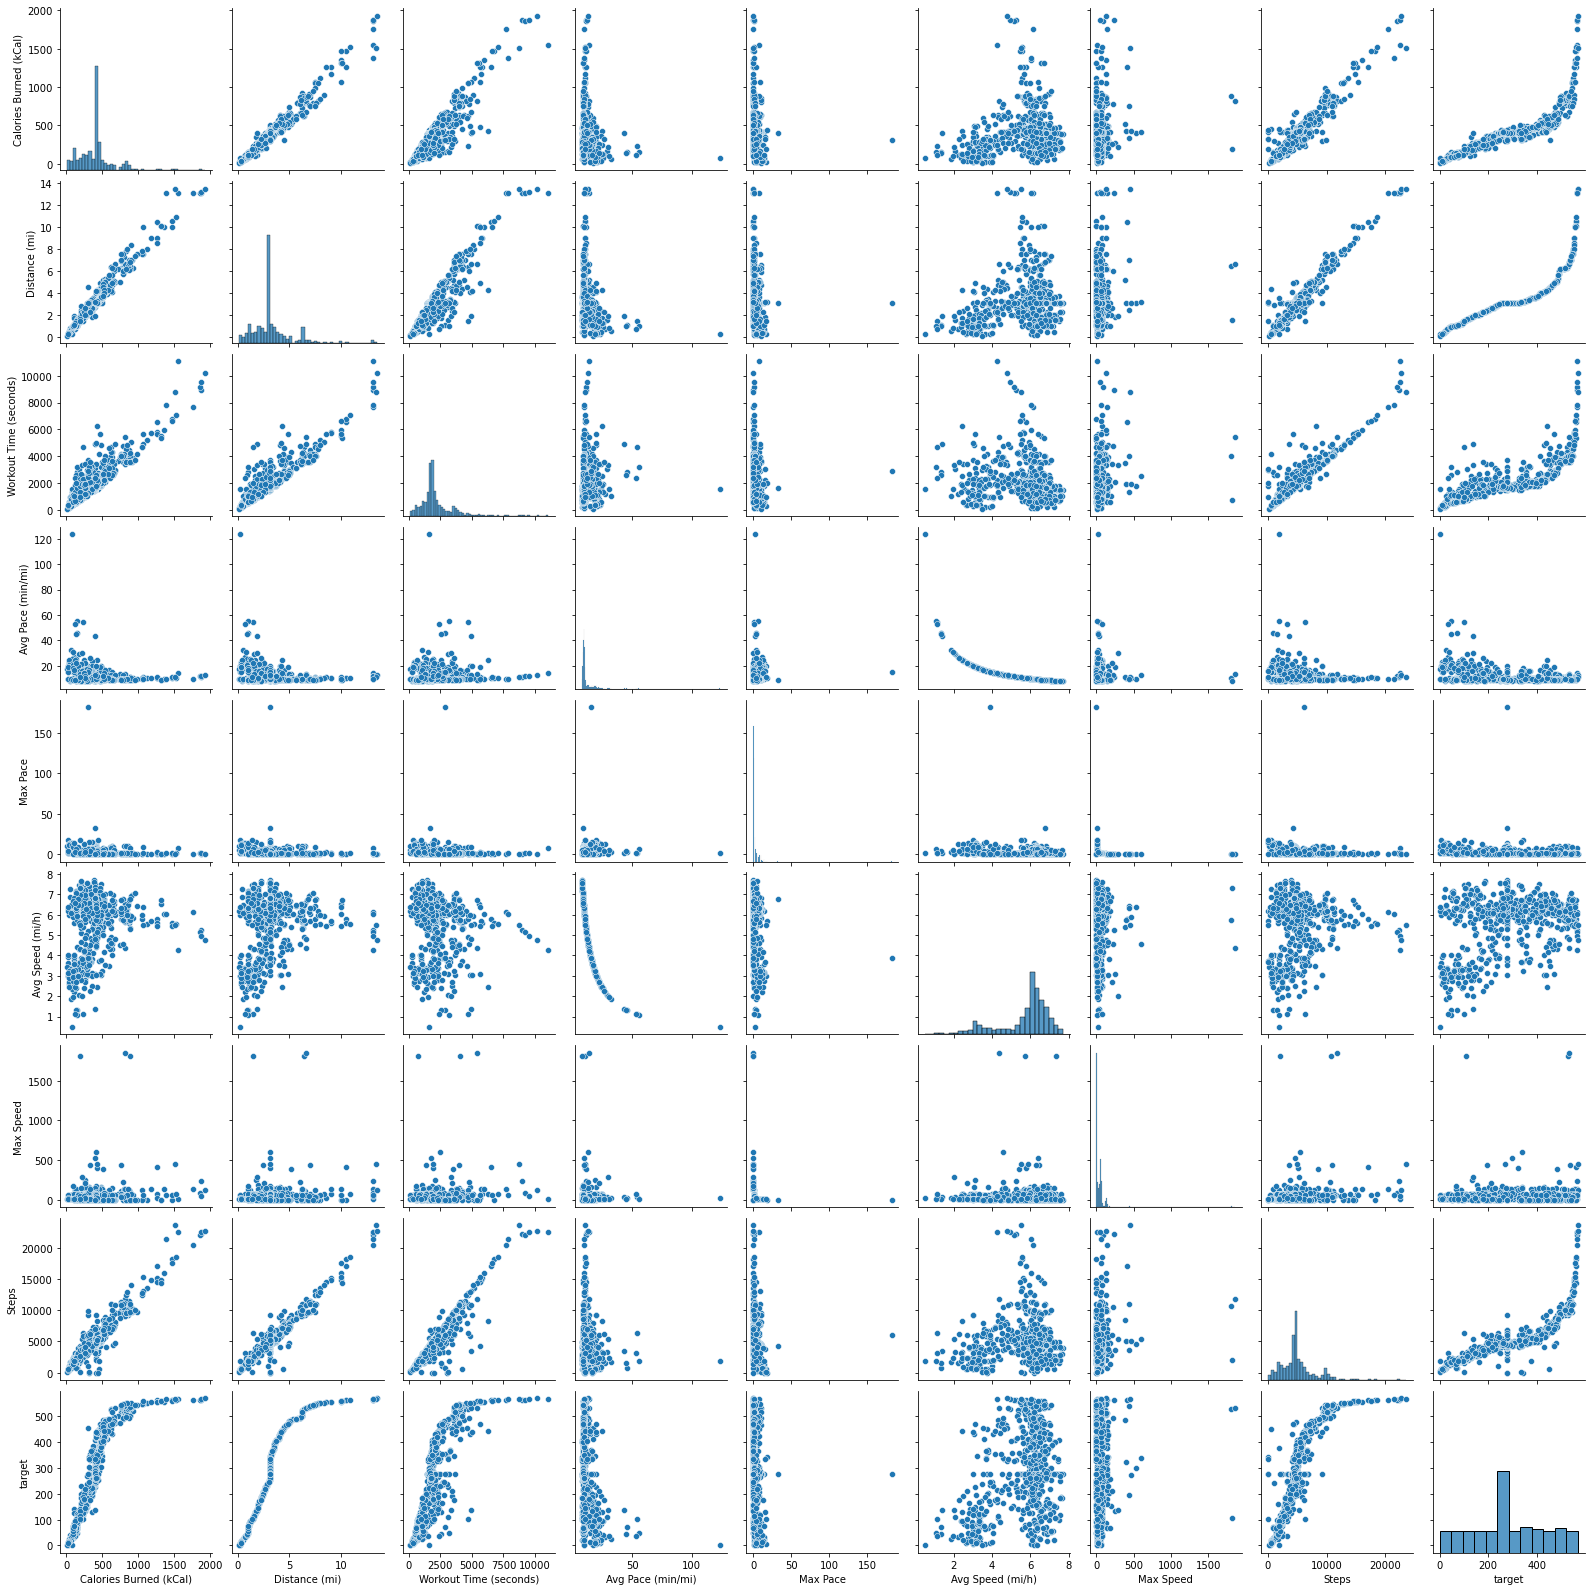

In [224]:
sns.pairplot(df)

<AxesSubplot:>

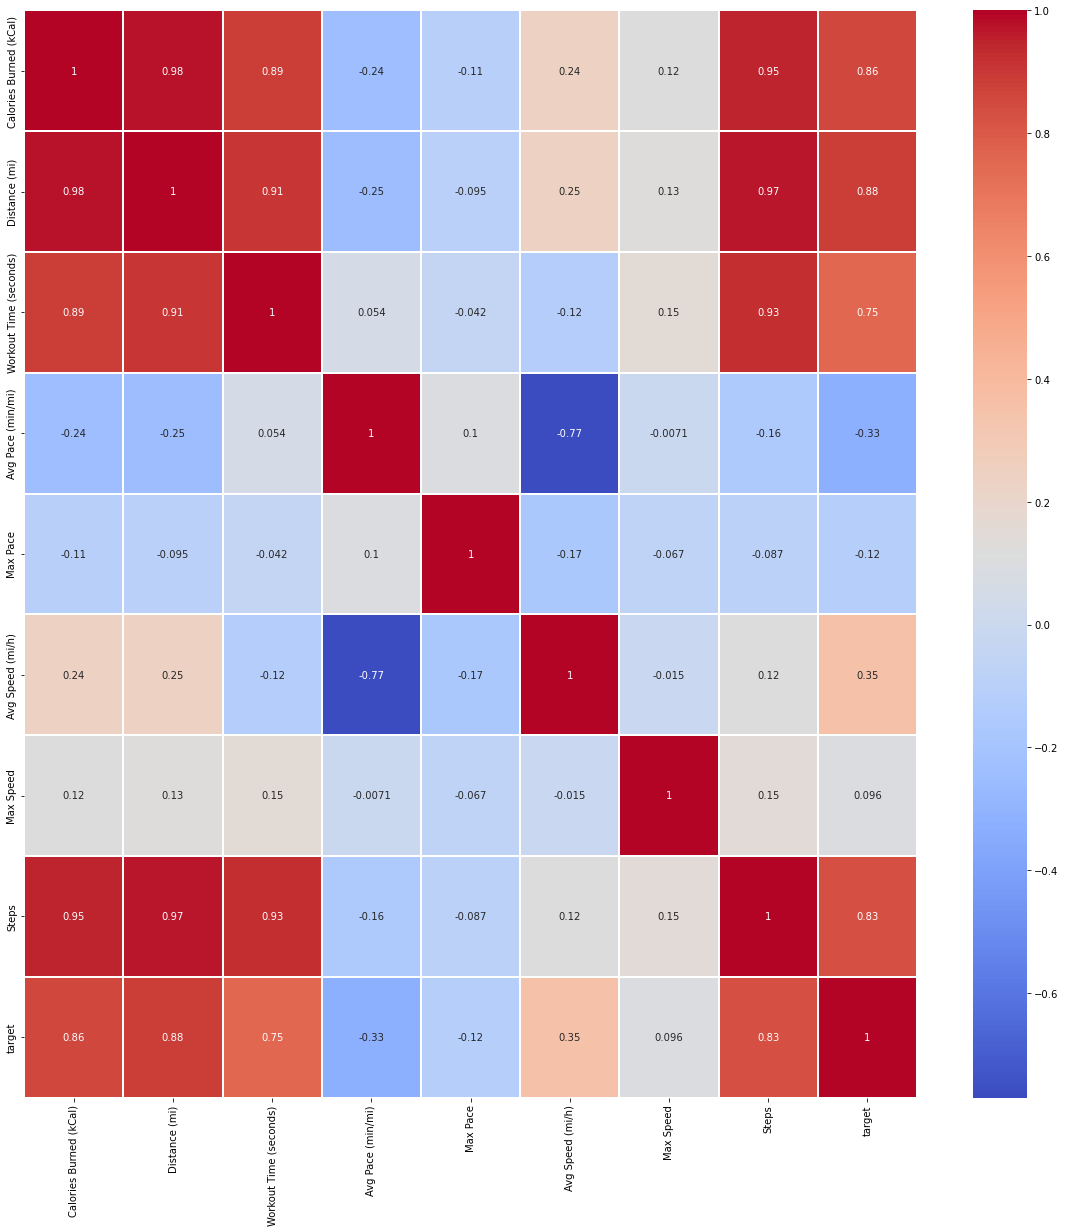

In [225]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=2)


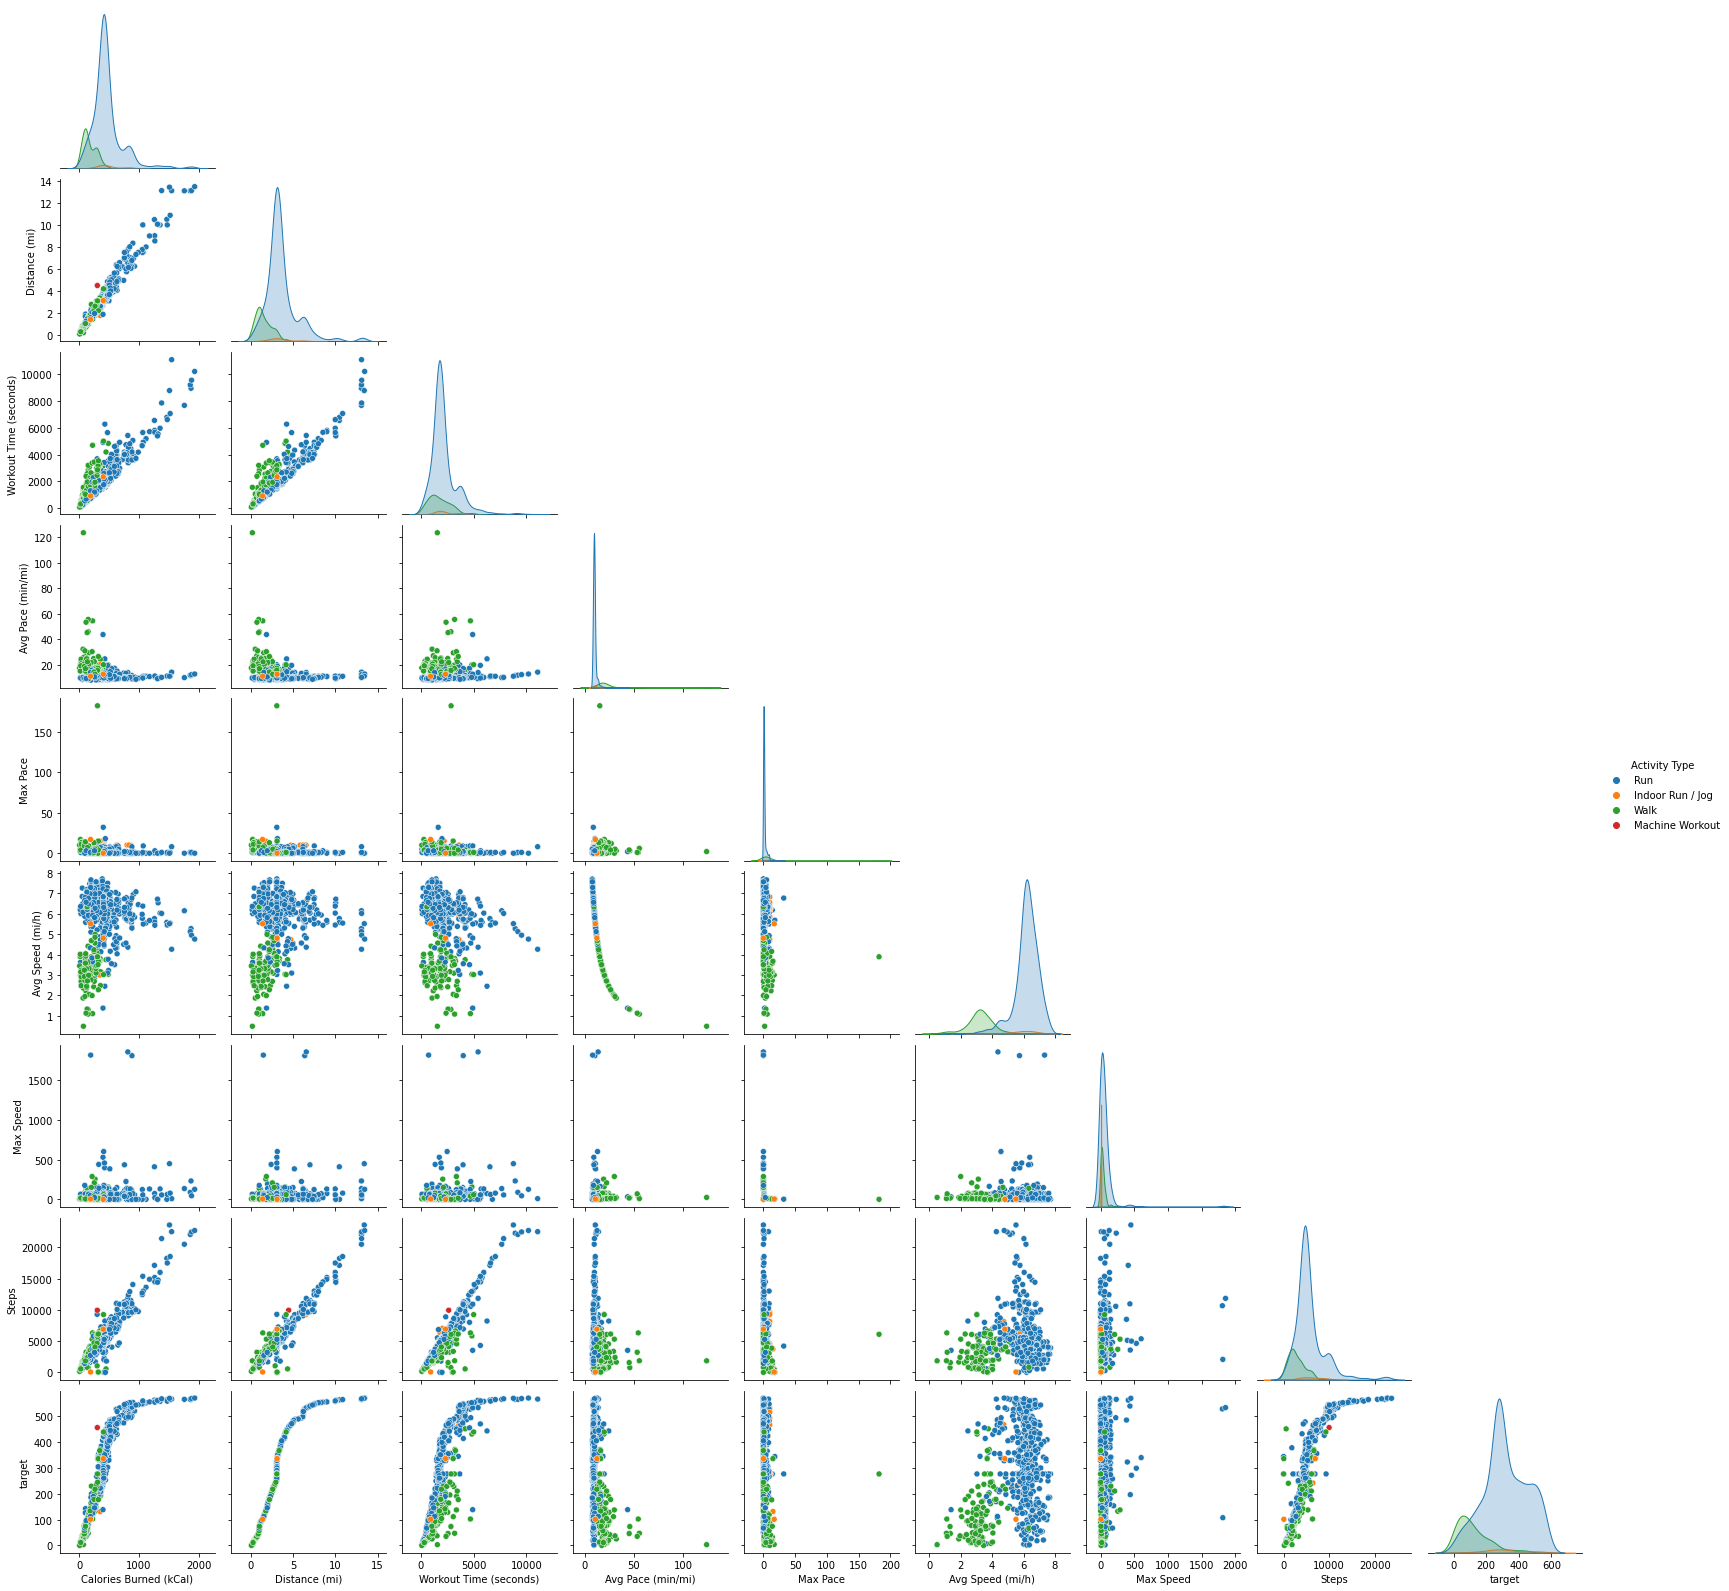

In [226]:
sns.pairplot(df, hue='Activity Type', corner=True)

In [227]:
df.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Steps,target
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,419.241935,3.327297,2140.037634,11.709219,2.118280,5.700652,47.375000,5226.739247,286.995968
std,266.377616,2.016979,1320.285115,6.587029,7.340369,1.332283,129.536405,3336.930767,148.078491
min,9.000000,0.090598,95.000000,7.774190,0.000000,0.485920,0.000000,6.000000,0.000000
25%,266.000000,2.238855,1535.000000,9.168295,0.000000,5.409192,0.000000,3556.500000,181.750000
50%,404.000000,3.100000,1802.500000,9.792460,1.000000,6.127165,19.000000,4686.500000,276.000000
75%,461.000000,3.632500,2389.500000,11.092275,2.000000,6.544297,60.000000,5849.750000,399.250000
max,1928.000000,13.481600,11065.000000,123.477000,182.000000,7.717840,1854.000000,23604.000000,569.000000


In [228]:
df.head(10)
#strip blank spaces from the dataframe
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.head(10)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,target
0,2022-12-24,2022-12-24,Run,411,3.10000,1763,9.47849,0,6.33012,0,,4692,276
1,2022-12-24,2022-12-23,Run,410,3.09999,1750,9.40860,0,6.37714,0,,4661,275
2,2022-12-20,2022-12-20,Run,420,3.10000,1870,10.05380,0,5.96791,0,,4948,276
3,2022-12-20,2022-12-20,Run,411,3.10000,1760,9.46237,0,6.34091,0,,4685,276
4,2022-12-19,2022-12-18,Run,410,3.10000,1754,9.43011,0,6.36260,0,,4671,276
5,2022-12-19,2022-12-17,Run,410,3.10000,1748,9.39785,0,6.38444,0,,4656,276
6,2022-12-14,2022-12-14,Run,272,2.02000,1201,9.90924,2,6.05495,25,150,1685,161
7,2022-12-12,2022-12-12,Run,418,3.10000,1836,9.87097,9,6.07843,7,160,4716,276
8,2022-12-11,2022-12-11,Run,418,3.10000,1845,9.91935,1,6.04878,50,,2325,276
9,2022-12-04,2022-12-04,Run,440,3.10000,2093,11.25270,2,5.33206,38,134,3227,276


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          744 non-null    object 
 1   Workout Date            744 non-null    object 
 2   Activity Type           744 non-null    object 
 3   Calories Burned (kCal)  744 non-null    int64  
 4   Distance (mi)           744 non-null    float64
 5   Workout Time (seconds)  744 non-null    int64  
 6   Avg Pace (min/mi)       744 non-null    float64
 7   Max Pace                744 non-null    int64  
 8   Avg Speed (mi/h)        744 non-null    float64
 9   Max Speed               744 non-null    int64  
 10  Avg Heart Rate          744 non-null    object 
 11  Steps                   744 non-null    int64  
 12  target                  744 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 75.7+ KB


In [230]:
#convert df['Avg Heart Rate'] to int
df = df.fillna(0)
#df['Avg Heart Rate'] = df['Avg Heart Rate'].astype(int)
#df['Avg Heart Rate'] = df['Avg Heart Rate'].astype(float)


#create a loop and for any blank item in Avg Heart Rate, replace it with 0

for item in df['Avg Heart Rate']:
    if type(item) == str:
        item = 0
    else:
        item = item


In [231]:
df3=df.mask(df == '')
df3.dropna(inplace=True)
df3 = df3.astype({'Avg Heart Rate': 'int32'})
df3 = df3[df3['Avg Heart Rate'] > 0]
avghr = round(df3['Avg Heart Rate'].mean(), 0)
avghr

142.0

In [232]:
#fill avg heart rate with the average heart rate
df['Avg Heart Rate'] = df['Avg Heart Rate'].fillna(avghr)

In [233]:
df['Avg Heart Rate'].fillna(0, inplace=True)

In [234]:
#use regex to replace blank spaces in avg heart rate with avghr
df['Avg Heart Rate'] = df['Avg Heart Rate'].replace(r'^\s*$', avghr, regex=True)

In [235]:
df.drop(columns=['Max Speed', 'Max Pace'], axis=1, inplace=True)

In [236]:
df['Avg Heart Rate'] = df['Avg Heart Rate'].astype(int)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          744 non-null    object 
 1   Workout Date            744 non-null    object 
 2   Activity Type           744 non-null    object 
 3   Calories Burned (kCal)  744 non-null    int64  
 4   Distance (mi)           744 non-null    float64
 5   Workout Time (seconds)  744 non-null    int64  
 6   Avg Pace (min/mi)       744 non-null    float64
 7   Avg Speed (mi/h)        744 non-null    float64
 8   Avg Heart Rate          744 non-null    int64  
 9   Steps                   744 non-null    int64  
 10  target                  744 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 64.1+ KB


In [242]:
df['minutes'] = df['Workout Time (seconds)'].apply(lambda x: x/60)
bins = [0, 20, 30, 50, 100, 150]
labels = ['0-20', '20-30', '30-50', '50-100', '100-150']
df['Times'] = pd.cut(df['minutes'], bins=bins, labels=labels, right=False)
distancebins = [0, 3.09, 6.19, 9.99, 13.1, 26.2]
distancelabels = ['0-3.09', '3.09-6.19', '6.19-9.99', '9.99-13.1', '13.1-26.2']
df['Distances'] = pd.cut(df['Distance (mi)'], bins=distancebins, labels=distancelabels, right=False)
TwentyTwentyTwo = df[df['Workout Date'] >= '2022-01-01']
miles = TwentyTwentyTwo['Distance (mi)'].sum()
df.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Avg Speed (mi/h),Avg Heart Rate,Steps,target,minutes,Times,Distances
0,2022-12-24,2022-12-24,Run,411,3.10000,1763,9.47849,6.33012,142,4692,276,29.383333,20-30,3.09-6.19
1,2022-12-24,2022-12-23,Run,410,3.09999,1750,9.40860,6.37714,142,4661,275,29.166667,20-30,3.09-6.19
2,2022-12-20,2022-12-20,Run,420,3.10000,1870,10.05380,5.96791,142,4948,276,31.166667,30-50,3.09-6.19
3,2022-12-20,2022-12-20,Run,411,3.10000,1760,9.46237,6.34091,142,4685,276,29.333333,20-30,3.09-6.19
4,2022-12-19,2022-12-18,Run,410,3.10000,1754,9.43011,6.36260,142,4671,276,29.233333,20-30,3.09-6.19
